<a href="https://colab.research.google.com/github/Shrason/Projects/blob/main/Netfiz_Movie_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netfiz Movie Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#How many ".csv" files are available in the dataset?

In [ ]:
df = pd.read_csv('movies.csv')
dr = pd.read_csv('ratings.csv')
dl = pd.read_csv('links.csv')
dt = pd.read_csv('tags.csv')

#What is the shape of "movies.csv"?


In [ ]:
df.shape

(9742, 3)

#What is the shape of "ratings.csv"?


In [ ]:
dr.shape

(100836, 4)

#How many unique "userId" are available in "ratings.csv"?


In [ ]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
unique_userid = dr['userId'].nunique()
print('The number of unique userid is', unique_userid)

The number of unique userid is 610


#Which movie has recieved maximum number of user ratings?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
movie_stats = dr.groupby('movieId')['rating'].count()
max_movieid = movie_stats.idxmax()
max_movie = df.loc[df['movieId']== max_movieid]
print(max_movie['title'].item())

Forrest Gump (1994)


#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [ ]:

row = df.loc[df['title'] == 'Matrix, The (1999)']
print(row)

      movieId               title                  genres
1939     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller


In [ ]:
m_tags = dt.loc[dt['movieId']==2571]
print(m_tags)

      userId  movieId                 tag   timestamp
815      424     2571        martial arts  1457842912
816      424     2571              sci-fi  1457842899
1646     474     2571  alternate universe  1137204991
2794     537     2571          philosophy  1424141098
2795     537     2571    post apocalyptic  1424141101


#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [ ]:
row1 = df.loc[df['title'] == "Terminator 2: Judgment Day (1991)"]
print(row1)

     movieId                              title         genres
507      589  Terminator 2: Judgment Day (1991)  Action|Sci-Fi


In [ ]:
movieid = dr.loc[dr['movieId']==589]
Avg_rating = movieid['rating'].mean()
print(Avg_rating)


3.970982142857143


#How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [ ]:
row2 = df.loc[df['title'] == "Fight Club (1999)"]
print(row2)

      movieId              title                       genres
2226     2959  Fight Club (1999)  Action|Crime|Drama|Thriller


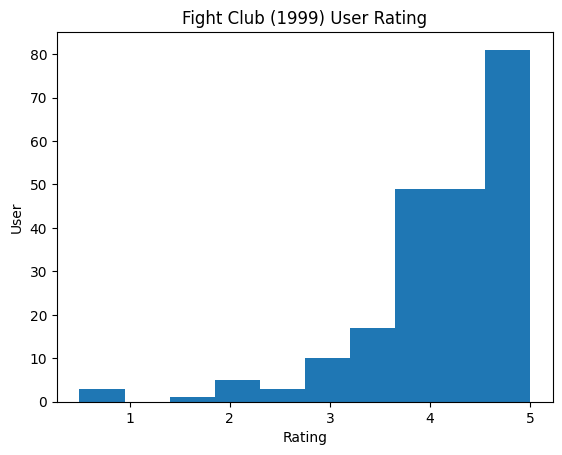

In [ ]:
data = dr.loc[dr['movieId']==2959]
plt.hist(data['rating'])
plt.title('Fight Club (1999) User Rating')
plt.xlabel('Rating')
plt.ylabel('User')
plt.show()

#Applying Note 1
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [ ]:
Aggregate = dr.groupby('movieId')['rating'].agg(['count','mean'])


In [ ]:
merge = pd.merge(Aggregate,df, on = 'movieId', how='inner')

In [ ]:
filter = merge.loc[merge['count']>50]

#Which movie is the most popular based on  average user ratings?


In [ ]:
sorted_df = filter.sort_values('mean',ascending=False)
top_5 = sorted_df.head(5)
print(top_5)

      movieId  count      mean  \
277       318    317  4.429022   
659       858    192  4.289062   
2224     2959    218  4.272936   
974      1276     57  4.271930   
602       750     97  4.268041   

                                                  title  \
277                    Shawshank Redemption, The (1994)   
659                               Godfather, The (1972)   
2224                                  Fight Club (1999)   
974                               Cool Hand Luke (1967)   
602   Dr. Strangelove or: How I Learned to Stop Worr...   

                           genres  
277                   Crime|Drama  
659                   Crime|Drama  
2224  Action|Crime|Drama|Thriller  
974                         Drama  
602                    Comedy|War  


#Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [ ]:
sorted_count = filter.sort_values('count',ascending=False)
top_5 = sorted_count.head(5)
print(top_5)

      movieId  count      mean                             title  \
314       356    329  4.164134               Forrest Gump (1994)   
277       318    317  4.429022  Shawshank Redemption, The (1994)   
257       296    307  4.197068               Pulp Fiction (1994)   
510       593    279  4.161290  Silence of the Lambs, The (1991)   
1938     2571    278  4.192446                Matrix, The (1999)   

                           genres  
314      Comedy|Drama|Romance|War  
277                   Crime|Drama  
257   Comedy|Crime|Drama|Thriller  
510         Crime|Horror|Thriller  
1938       Action|Sci-Fi|Thriller  


#Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [ ]:
Sci_fi = filter[filter['genres'].str.contains('Sci-Fi')]
sort = Sci_fi.sort_values('count',ascending=False)
first_5 = sort.head(5)
print(first_5)

      movieId  count      mean  \
1938     2571    278  4.192446   
224       260    251  4.231076   
418       480    238  3.750000   
507       589    224  3.970982   
897      1196    211  4.215640   

                                                  title  \
1938                                 Matrix, The (1999)   
224           Star Wars: Episode IV - A New Hope (1977)   
418                                Jurassic Park (1993)   
507                   Terminator 2: Judgment Day (1991)   
897   Star Wars: Episode V - The Empire Strikes Back...   

                                genres  
1938            Action|Sci-Fi|Thriller  
224            Action|Adventure|Sci-Fi  
418   Action|Adventure|Sci-Fi|Thriller  
507                      Action|Sci-Fi  
897            Action|Adventure|Sci-Fi  


Web Scrapping

In [ ]:
 pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install bs4


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan

In [ ]:
def scrapper(imdbId):
    id = imdbId[2:]
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
imdb_ids = ['tt0111161', 'tt0068646', 'tt0468569']  # Example IDs
ratings = []
for id in imdb_ids:
    rating = scrapper(id)
    ratings.append(rating)
print(ratings)



[None, None, None]
